In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [94]:
%ls 'online shoppers/'

online_shoppers_intention.csv*


In [95]:
df = pd.read_csv('online shoppers/online_shoppers_intention.csv')
df = df.drop(columns='Administrative')
cols = ['Month','VisitorType']
for col in cols:
    df.loc[:,col] = df[col].astype('category').cat.codes

df_train, df_test = train_test_split(df, test_size=0.33)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8261 entries, 8311 to 1672
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  8261 non-null   float64
 1   Informational            8261 non-null   int64  
 2   Informational_Duration   8261 non-null   float64
 3   ProductRelated           8261 non-null   int64  
 4   ProductRelated_Duration  8261 non-null   float64
 5   BounceRates              8261 non-null   float64
 6   ExitRates                8261 non-null   float64
 7   PageValues               8261 non-null   float64
 8   SpecialDay               8261 non-null   float64
 9   Month                    8261 non-null   int8   
 10  OperatingSystems         8261 non-null   int64  
 11  Browser                  8261 non-null   int64  
 12  Region                   8261 non-null   int64  
 13  TrafficType              8261 non-null   int64  
 14  VisitorType          

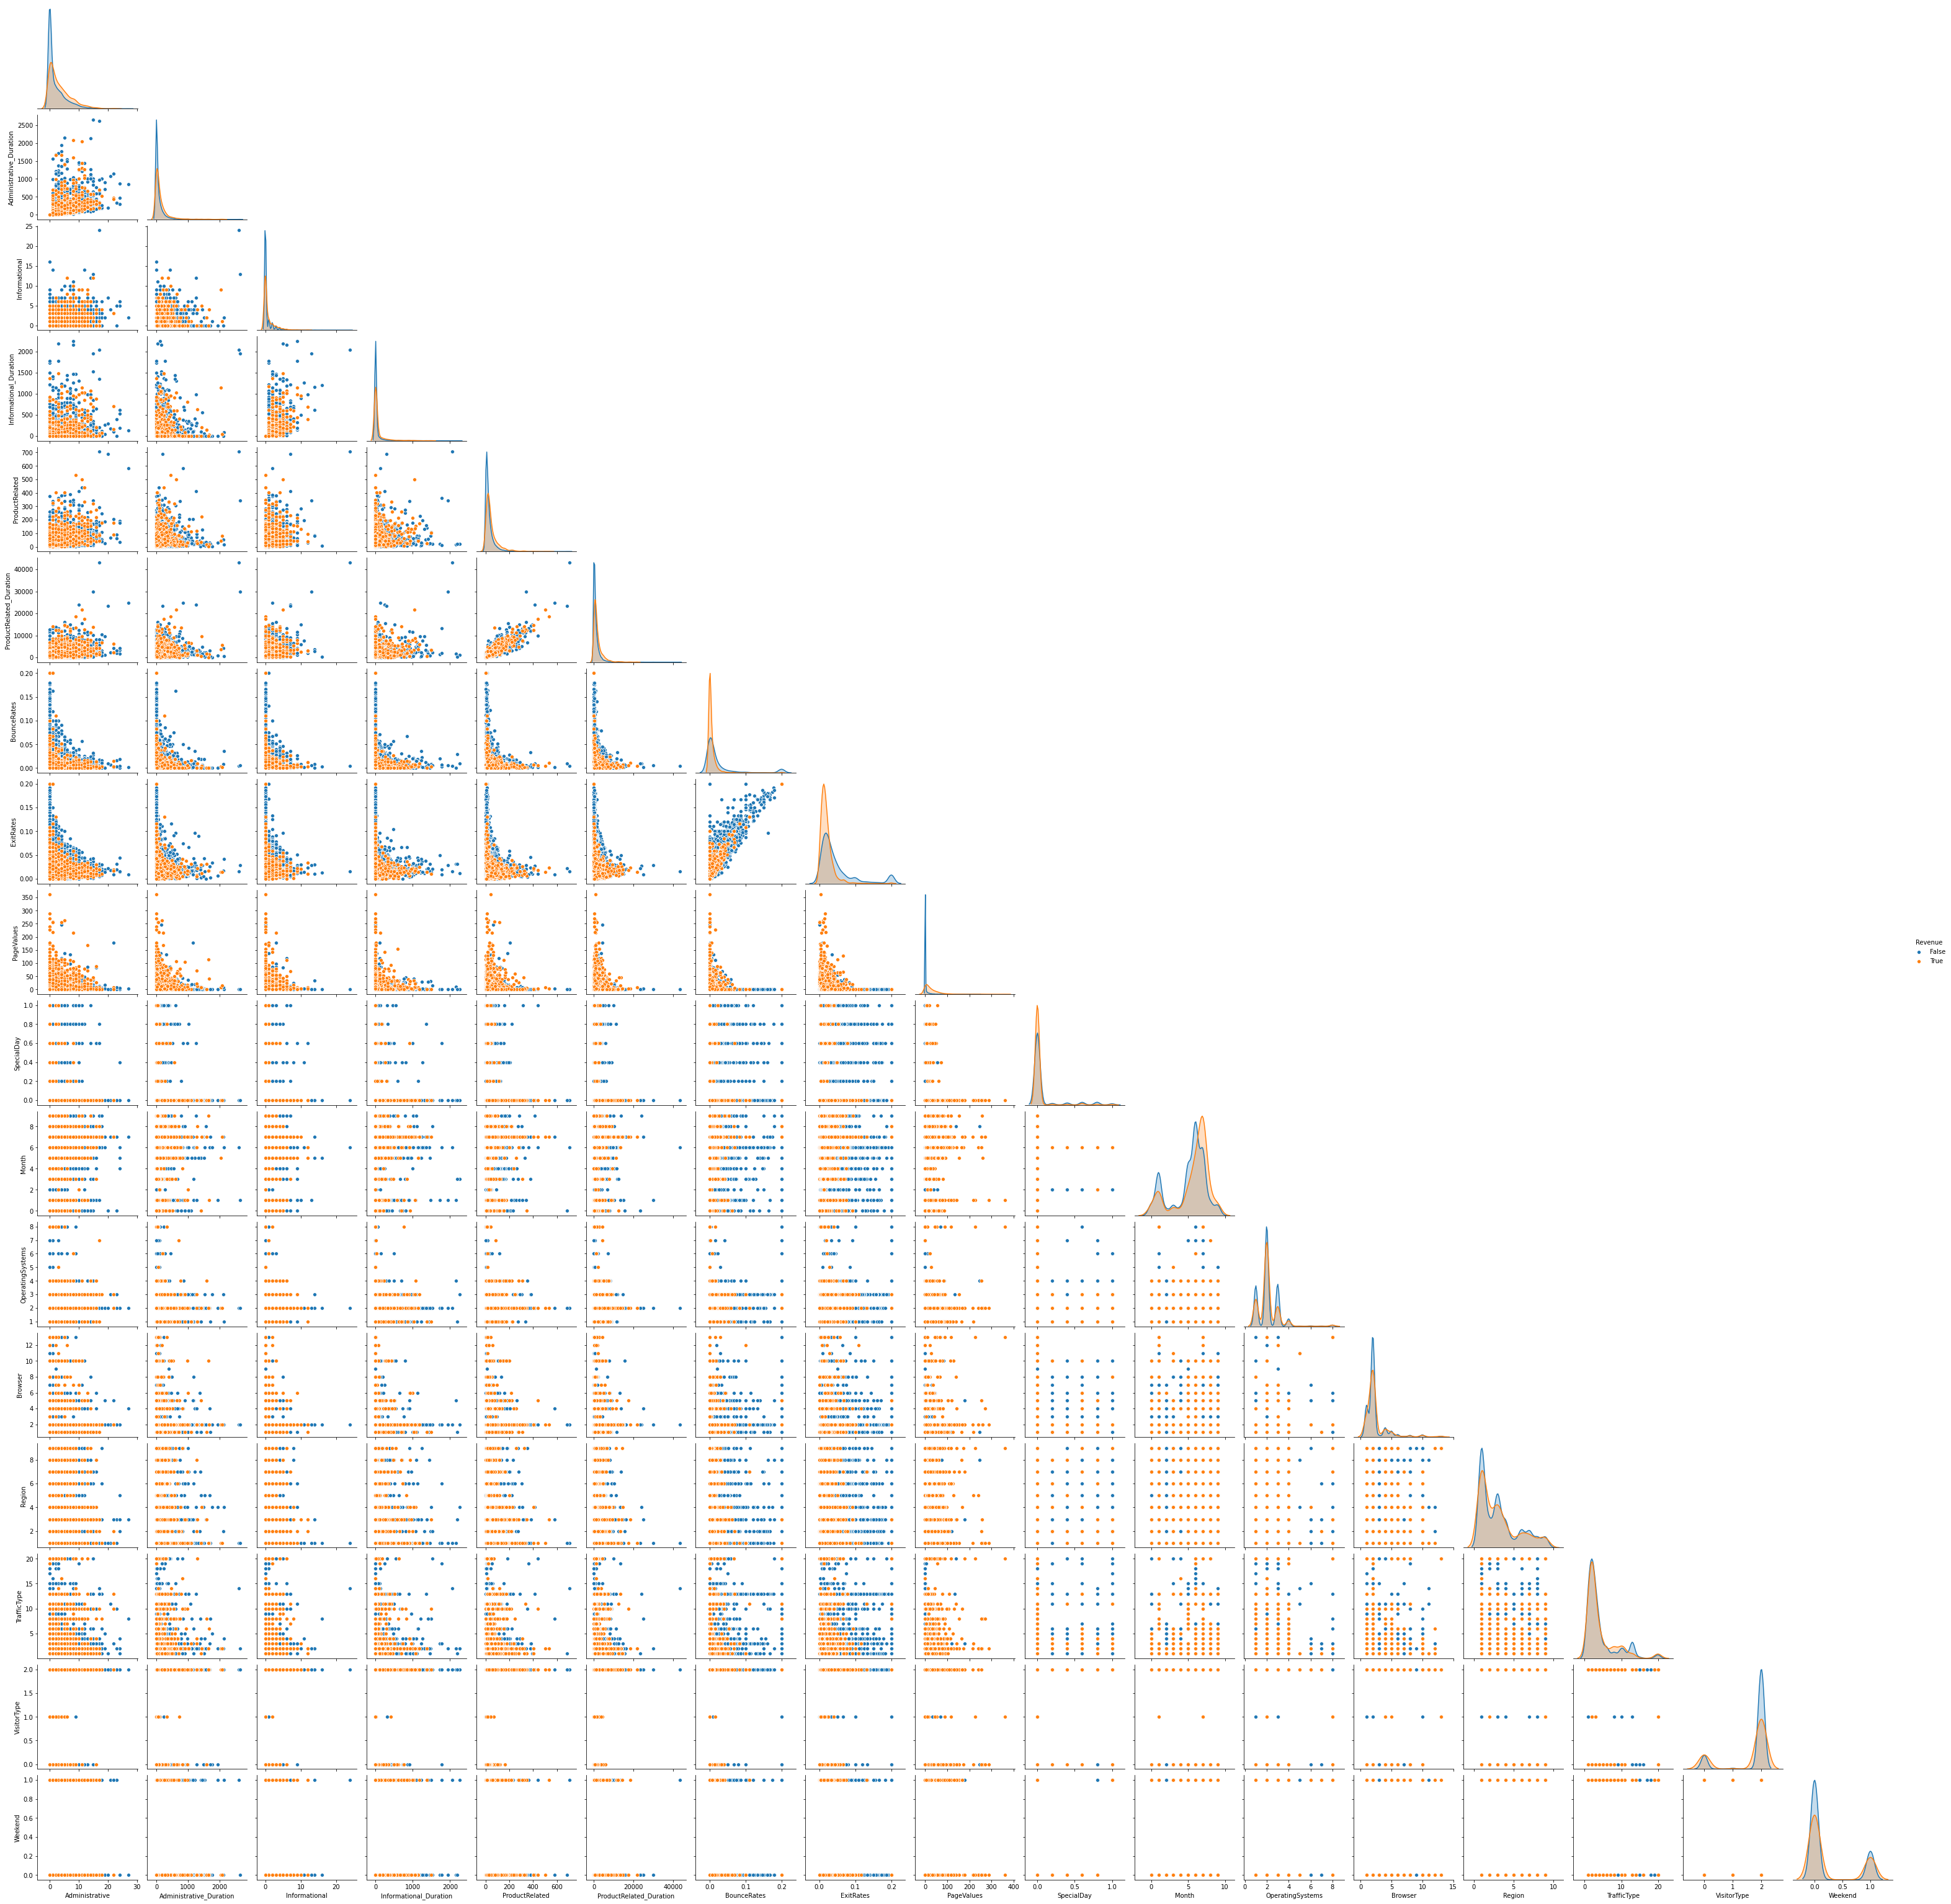

In [30]:
plt.rcParams['figure.figsize']=(20,20)
sns.pairplot(df_train, hue="Revenue", corner=True)

In [96]:
cols = ['PageValues',
        'ProductRelated_Duration',
        'Informational_Duration',
        'Administrative_Duration',
        'Informational',
        'PageValues']
df_filtered = df_train[(np.abs(stats.zscore(df_train[cols])) < 2).all(axis=1)]

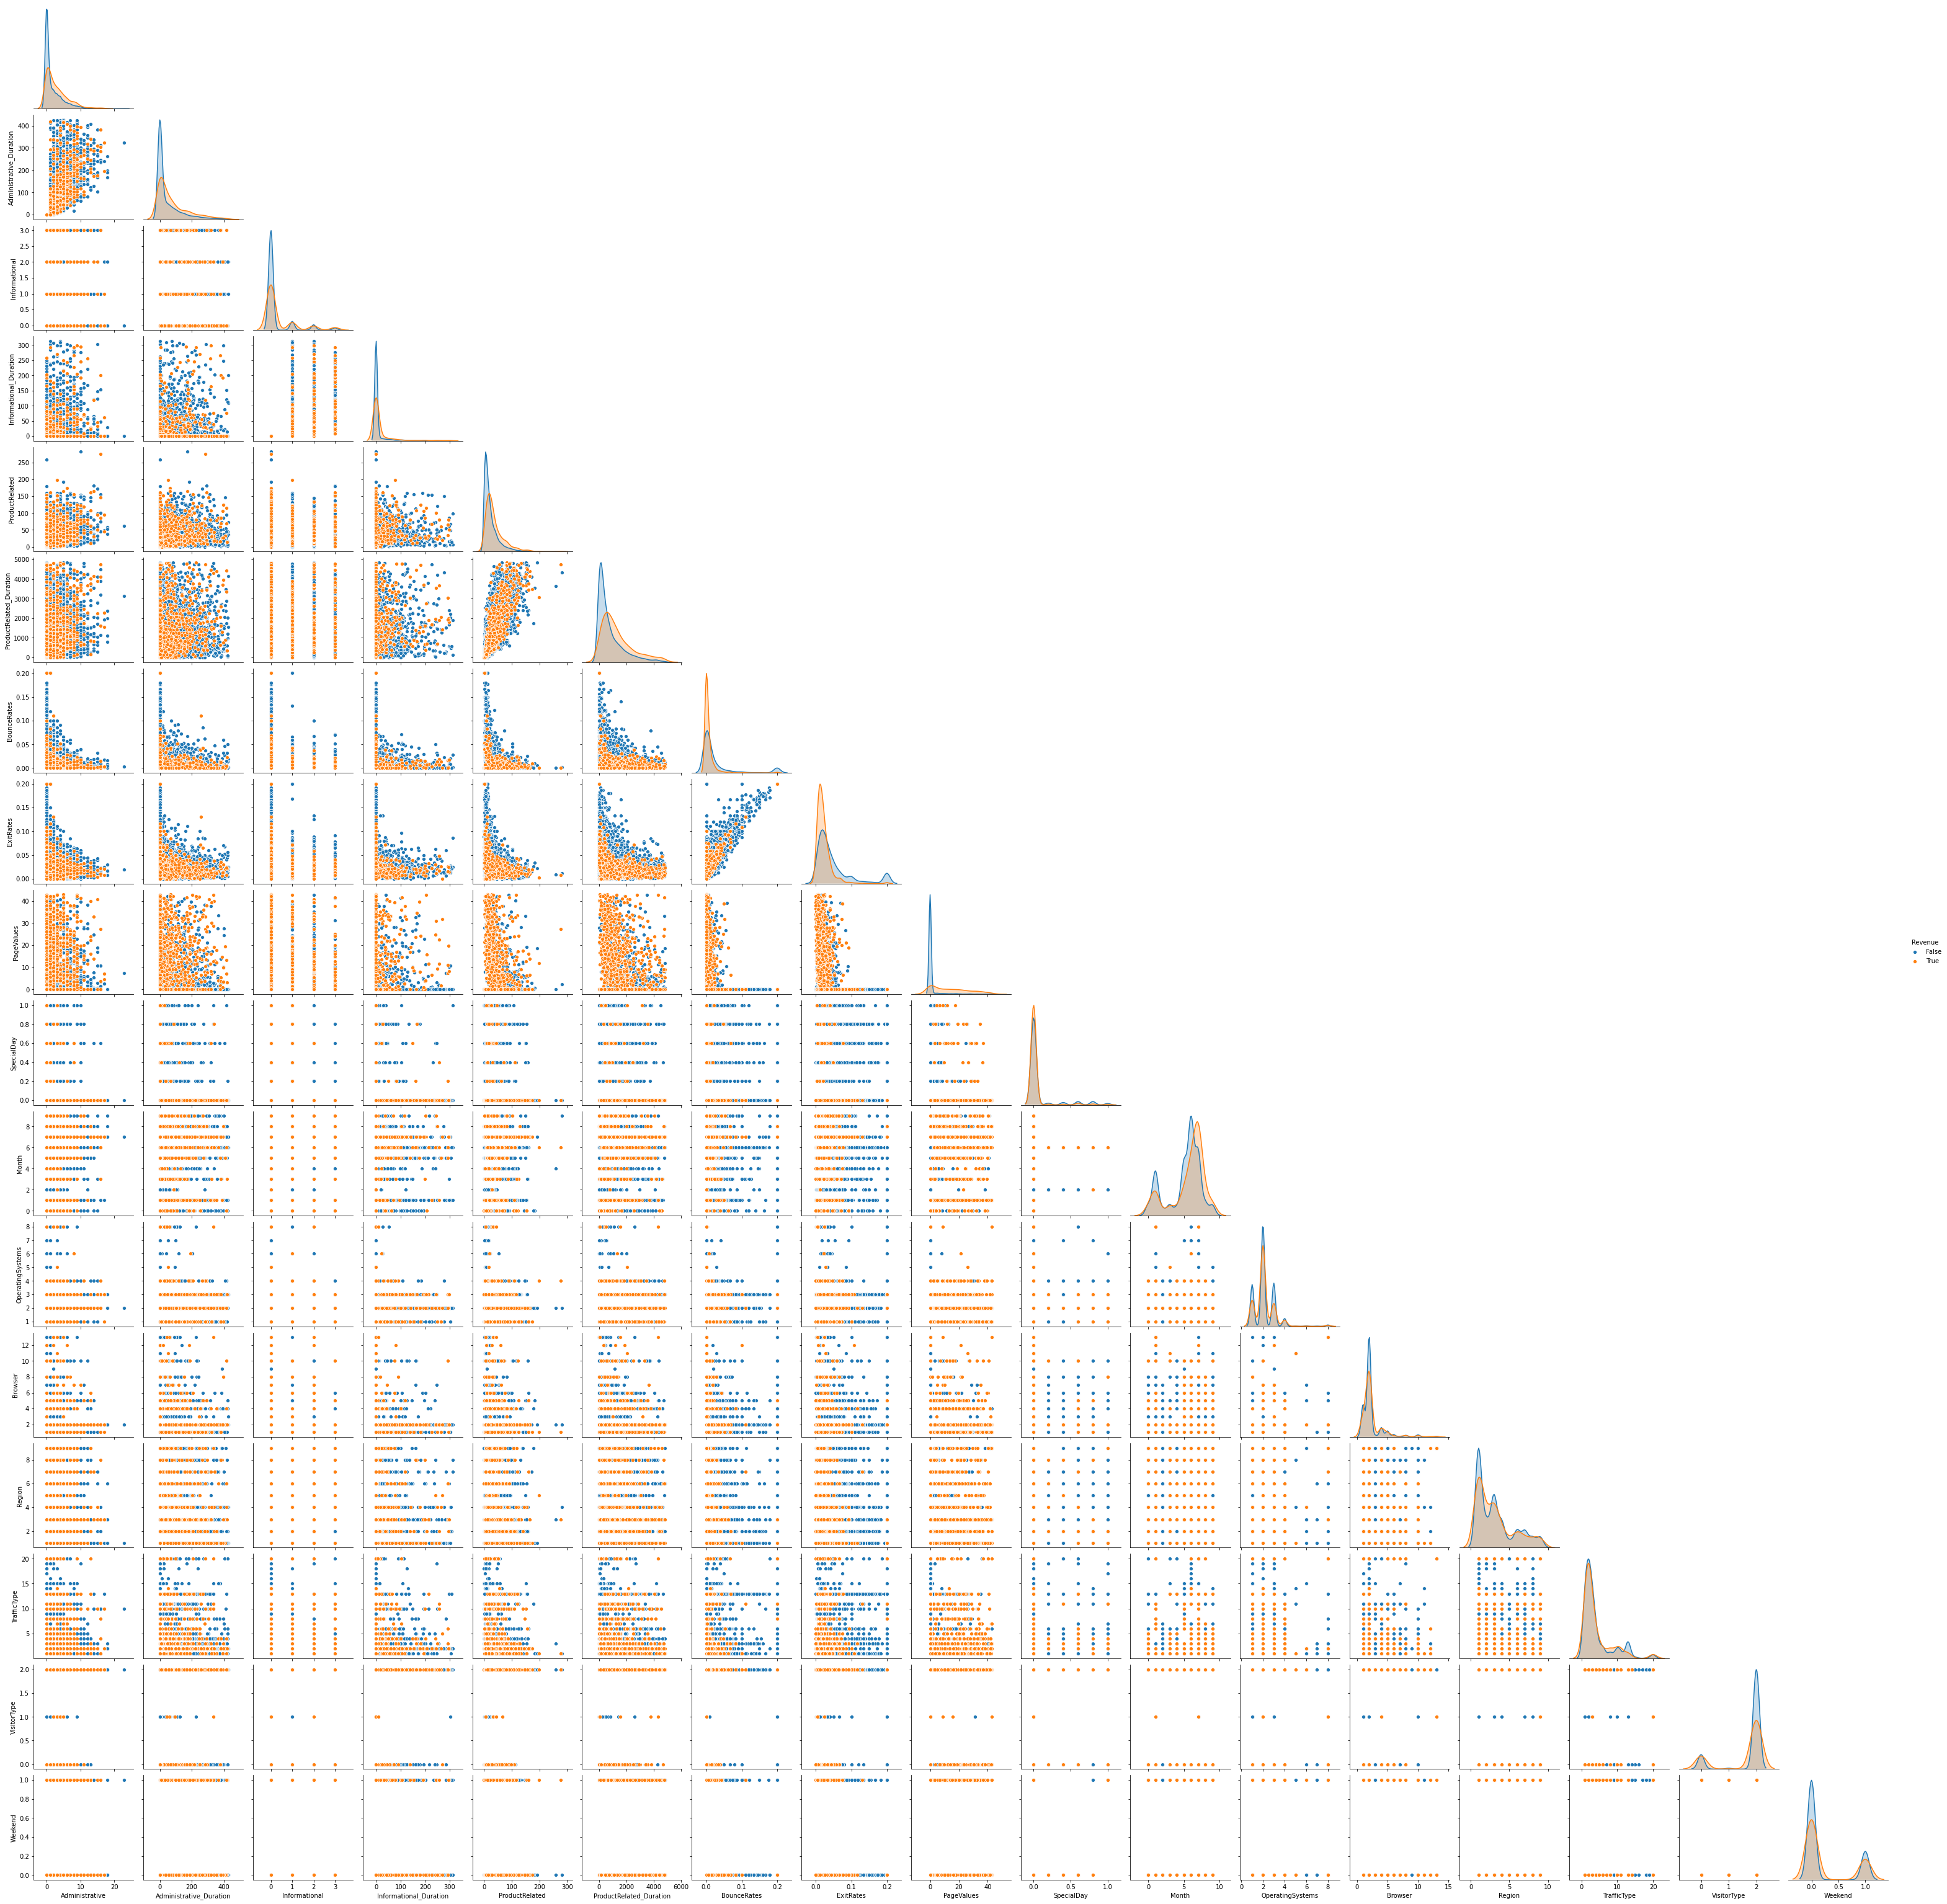

In [34]:
plt.rcParams['figure.figsize']=(20,20)
sns.pairplot(df_filtered, hue="Revenue", corner=True)

In [97]:
scaler = StandardScaler()
df_filtered.loc[:,cols] = scaler.fit_transform(df_filtered[cols])
df_test.loc[:,cols] = scaler.transform(df_test[cols])

dscrtzr = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
clmn_trnsfrmr = ColumnTransformer([("KBinsDiscretizer", dscrtzr, cols)])

df_filtered.loc[:,cols] = clmn_trnsfrmr.fit_transform(df_filtered)
df_test.loc[:,cols] = clmn_trnsfrmr.transform(df_test)

/media/amir/Third/Applied_Machine_Learning_S20_Assignments/aml_env/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/media/amir/Third/Applied_Machine_Learning_S20_Assignments/aml_env/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/media/amir/Third/Applied_Machine_Learning_S20_Assignments/aml_env/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWit

In [98]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7055 entries, 8311 to 6185
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  7055 non-null   float64
 1   Informational            7055 non-null   float64
 2   Informational_Duration   7055 non-null   float64
 3   ProductRelated           7055 non-null   int64  
 4   ProductRelated_Duration  7055 non-null   float64
 5   BounceRates              7055 non-null   float64
 6   ExitRates                7055 non-null   float64
 7   PageValues               7055 non-null   float64
 8   SpecialDay               7055 non-null   float64
 9   Month                    7055 non-null   int8   
 10  OperatingSystems         7055 non-null   int64  
 11  Browser                  7055 non-null   int64  
 12  Region                   7055 non-null   int64  
 13  TrafficType              7055 non-null   int64  
 14  VisitorType          

In [99]:
df_filtered.describe()

,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000
mean,0.668320,0.551665,0.172360,23.908434,0.953933,0.024863,0.047087,0.378172,0.068944,5.122750,2.119773,2.349398,3.153933,4.062934,1.720057
std,1.341993,1.513427,0.770745,26.639794,1.483681,0.051779,0.051172,1.212416,0.210224,2.349879,0.905344,1.699069,2.392777,3.991664,0.689147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.015385,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,15.000000,0.000000,0.003175,0.028520,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000
75%,1.000000,0.000000,0.000000,32.000000,1.000000,0.020000,0.053333,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000
max,7.000000,7.000000,7.000000,282.000000,7.000000,0.200000,0.200000,7.000000,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000


In [100]:
df_filtered.to_csv('train.csv',index=False)
df_test.to_csv('test.csv',index=False)